In [20]:
import pandas as pd
import warnings
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
df = pd.read_csv('data/Language Detection.csv')

In [23]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [24]:
df["Language"].value_counts()

English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: Language, dtype: int64

In [25]:
train_X = df["Text"]
train_y = df["Language"]

In [26]:
le = LabelEncoder()
train_y = le.fit_transform(train_y)

In [27]:
data_list = []
# iterating through all the text
for text in train_X:
       # removing the symbols and numbers
        text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
        text = re.sub(r'[[]]', ' ', text)
        # text to lower case
        text = text.lower()
        data_list.append(text)

In [29]:
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
X.shape

(10337, 34937)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(X, train_y, test_size = 0.20)

In [31]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [32]:
y_pred = model.predict(x_test)

In [33]:
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [34]:
print("Accuracy is :",ac)

Accuracy is : 0.9792069632495164


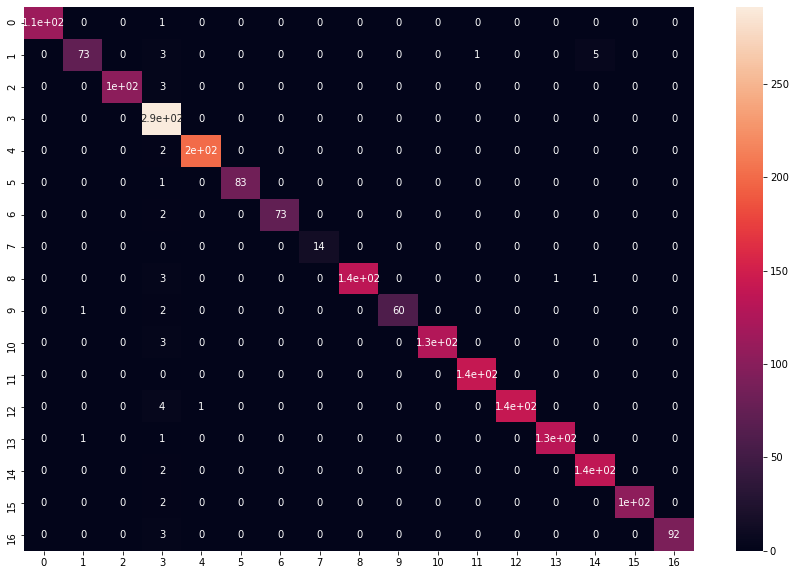

In [35]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [36]:
def predict(text):
    x = cv.transform([text]).toarray() # text to bag of words model (Vector)
    lang = model.predict(x) # prediction
    lang = le.inverse_transform(lang) # finding the language
    print("The langauge is in",lang[0]) 

In [37]:
predict('Hello')

The langauge is in English


In [41]:
predict('Вы говорите по-английски')

The langauge is in Russian


In [42]:
predict('പ്രോഗ്രാമിലെ ഏതെങ്കിലും ഒരു വാക്യം')

The langauge is in Malayalam


In [43]:
predict('Mi hermano está leyendo un libro.')

The langauge is in Spanish


In [47]:
predict('لمشكلة هي، أن معظمهم من يقضون عقوبات طويلة')

The langauge is in Arabic


In [48]:
predict("The end")

The langauge is in English
